# 참고

- https://www.kaggle.com/ash316/novice-to-grandmaster
- https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb

## 데이터 및 라이브러리 로드

In [25]:
import os
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [26]:
os.getcwd()

'C:\\Users\\JunDragon\\kaggel\\DSF'

In [27]:
#Load MCQ Responses into a Pandas DataFrame
mcq = pd.read_csv('C:/Users/JunDragon/kaggel/DSF/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [28]:
#Load Free Form Responses into a Pandas DataFrame
ff = pd.read_csv('C:/Users/JunDragon/kaggel/DSF/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

- 16,716명 이상의 사람들의 자료를 가지고 있다. 
- 사람들이 답한 MCQ 문항은 228개가 넘었고 자유형 문항은 62개였다. 
- 질문의 수가 엄청나게 많으므로(총 300개가 넘는) 사람들이 모든 질문에 대답하기를 기대하는 것은 타당하지 않을 것이다. 
- 즉, 우리의 데이터 포인트는 대부분 무효가 될 것으로 예상된다.

## 설문조사 인구통계

결과를 더 잘 해석하고 순진하게 액면 그대로 받아들이지 않도록 하기 위해서는 응답자들의 인구통계를 이해하는 것이 중요하다.

### 성별

우선 응답자들의 성별 균형을 살펴보자.

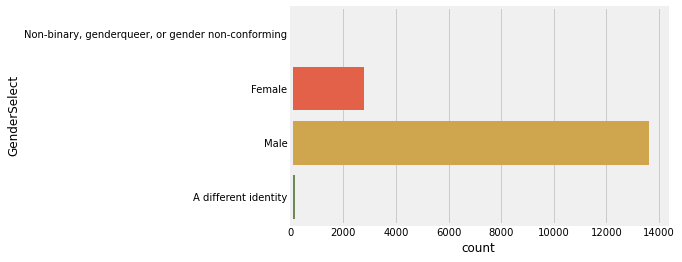

In [29]:
#The Seaborn Countplot function counts the number of instances of each category and renders a barplot.
sns.countplot(y='GenderSelect', data=mcq)

**응답자들이 압도적으로 남성이라는 것을 안다.**
- 이는 데이터 과학과 일반적으로 기술 분야에서 매우 심각한 문제를 반영한다. 성비는 남성 쪽으로 심하게 치우쳐 있다.
- 대부분의 질문에 대해서는 성 편향성은 너무 심하지는 않을 것으로 본다.

In [33]:
question = pd.read_csv('C:/Users/JunDragon/kaggel/DSF/schema.csv')
question.shape

(290, 3)

In [34]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [35]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('C:/Users/JunDragon/kaggel/DSF/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [36]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [37]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


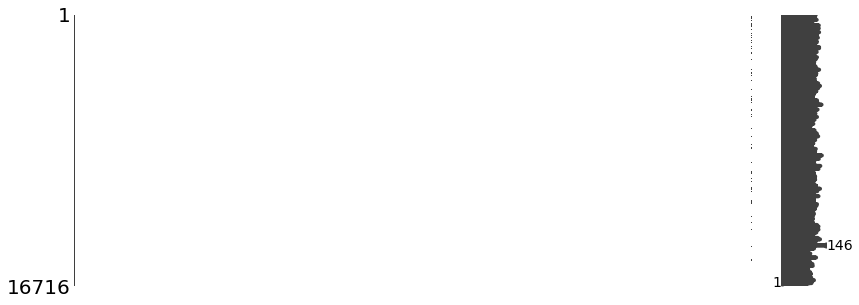

In [38]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

### 나라

국가마다 데이터 과학자의 기술 스택, 연령 그룹 및 교육 수준과 같은 것에 관한 선호도와 추세가 다른 경향이 있다. 응답자들의 국적에 대한 큰 그림은 우리에게 국가 편향에 대한 아이디어를 줄 수 있어야 한다.

In [42]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(21)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


- 미국과, 인도가 가장 많은 응답자를 차지하고 있으며, 모두 합치면 인구의 3분의 1 이상을 차지한다. 
- 따라서 데이터 집합에 포함된 답변은 미국인과 인디언에게 보다 목적적합하고 편향될 것으로 예상된다. 
- 그러나 우리는 이것을 너무 많이 들여다보지 않고 (예: 급여를 고려할 때) 절대적으로 필요할 때만 빼고 편견을 없애려고 노력할 것이다.

In [43]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [62]:
#연령 분포
fig = fig_fact.create_distplot([mcq[mcq['Age'] > 0]['Age']], ['age'], colors=['#BA68C8'])
py.iplot(fig, filename='Basic Distplot')
#sns.distplot(mcq[mcq['Age'] > 0]['Age'])

- 응답자들은 인구의 75% 이상이 37세 미만으로 비교적 젊은 편이다..
- 평균 연령과 중위연령은 각각 32세, 30세 이다 
- 응답자 대다수는 25-35세 연령대에 속한다.

### 교육 수준

응답자들은 어떤 수준의 정규 교육을 받았는가? 답을 얻기 위해 자료를 살펴보자.

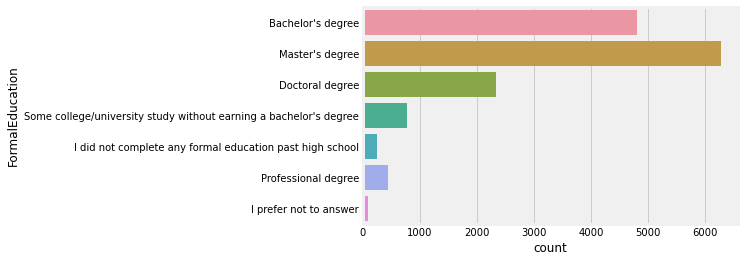

In [47]:
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다. 소프트웨어 공학이나 웹 개발 같은 관련 분야보다 훨씬 높은 것 같다.

### 학부 전공

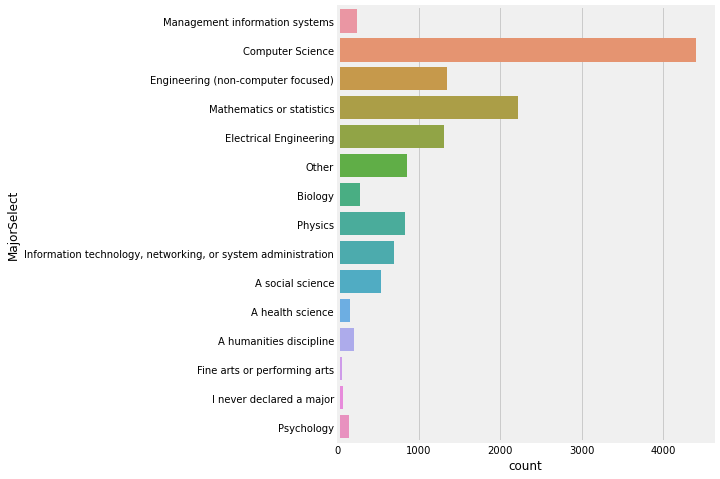

In [48]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

- 응답자의 대다수는 **컴퓨터과학**, **수학** 또는 **엔지니어링**에 학부 전공자가 있다. 
- 수학, CS도 데이터 사이언스와의 교차점이 되는 분야다. 
- 그렇긴 하지만, 우리 데이터 집합에 등록된 전공자의 수는 인문, 미술, 문과 등 각계각층의 사람들이 들어오면서 상당히 다양하다.

### 고용현황

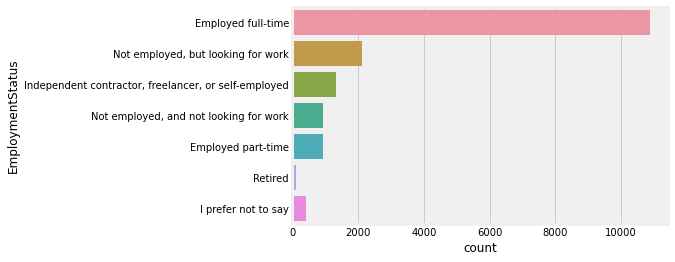

In [49]:
sns.countplot(y='EmploymentStatus', data=mcq)

- **응답자의 대다수는 정규직으로 고용되어 있다.** 
- 이 데이터를 통해 관찰되는 추세가 데이터 과학 직무 보유자 사이에 존재하는 선호도와 의견을 잘 나타내게 될 것이며, 그 결과 현장에서의 취업 전망과 상당히 잘 상관될 수 있기 때문에 이는 좋은 일이다.

### 프로그래밍 경험

데이터 과학 분야에서 코드를 작성한 경험이 있는 응답자는? 데이터 집합의 테뉴어 기능은 이 질문에 대한 해답을 제공할 수 있다.

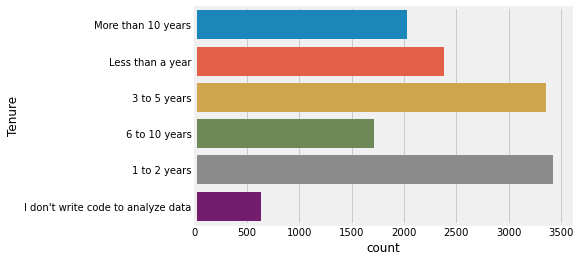

In [50]:
sns.countplot(y='Tenure', data=mcq)

- 응답자 대부분은 코드 작성 경력이 5년 미만인 경우가 대부분 코드 작성 경력은 5년 미만이다. 
- **상당량의 많은 사람들이  코드 작성 경력이 2년 미만인 경우이다..** 
- 이 정보는 이전 항에서 추출한 정보(대부분의 인구가 고용되어 있음)와 결합되어 데이터 과학 분야에 침입하기 위해 프로그래밍에 너무 많은 전문가가 될 필요가 없음을 시사한다.

## 자주 묻는 질문

우리는 이제 우리 인구의 인구 통계에 대한 좋은 생각을 갖게 되었다. 이제 노트의 주요 섹션으로 이동하여 데이터 과학 분야의 초보자들이 가장 많이 묻는 몇 가지 질문에 답해 봅시다.

### Q1. 어느 언어를 배워야 할까? Python? R?

- 데이터 과학에 대해 처음이자 가장 일반적으로 묻는 질문 중 하나는 언어 선호도다.
- **Python**과 **R**는 데이터 사이언스에서 가장 보편적인 언어로서, 둘 다 각자의 언어로 맹세하는 확고한 지지자 커뮤니티를 가지고 있다. 우리의 응답자들이 어떤 말을 했는지 살펴봅시다.

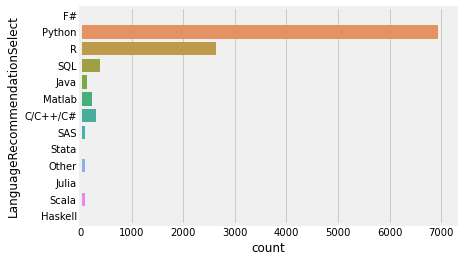

In [51]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

- **파이썬***은 전반적인 선호도에 있어서는 언어 선호도 경쟁에서 확실히 승리한 것으로 보인다. 
- 좀 더 깊이 파고들어서 어떤 직업과 직업들이 어떤 언어를 선호하는지 알아보자.

#### 작은 우회도로: 특정 연령대가 특정 언어를 선호하는가?
이것은 논평자 중 한 명인 [Baptiste Garro](https://www.kaggle.com/baptistegarro))이 던진 질문이었다.어떤 일이 있는지 한번 봅시다.

In [52]:
top_lang = mcq['LanguageRecommendationSelect'].value_counts()
top_lang_dist = []
for lang in top_lang.index:
    top_lang_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['LanguageRecommendationSelect'] == lang)]['Age'])

group_labels = top_lang.index

fig = fig_fact.create_distplot(top_lang_dist, group_labels, show_hist=False)
py.iplot(fig, filename='Language Preferences by Age')


- 우리의 거의 모든 언어가 거의 중복되는 연령 분포를 가지는 경향이 있다는 것을 알 수 있다.
- 이는 나이에 따른 선호도가 거의 또는 전혀 없다는 것을 의미한다. 
- 이에 대한 유일한 예외는 좀 더 노련한 프로그래머들에게 인기를 끌게 된 **줄리아**프로그래밍 언어와 젊은 세대들에게 더 인기가 있는 **하스켈**이다.

**우회 종료**

다음으로 나는 가장 인기 있는 데이터 과학 언어인 파이톤과 R의 직업별 선호도를 확인할 것이다.

In [53]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

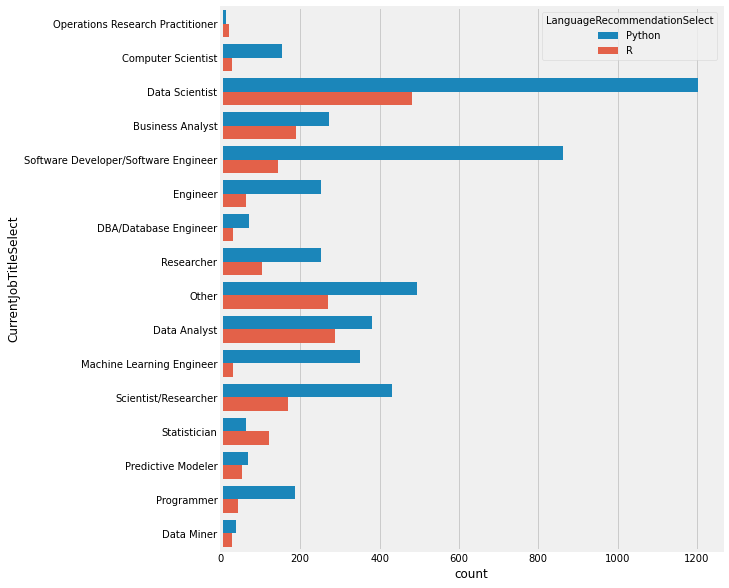

In [61]:
#직업별 R 및 Python 사용자 수
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

- 거의 모든 직업들은 그들의 언어선택권고안으로 **파이썬**을 선호하는 경향이 있다. 
- 중요한 예외는 일반적으로 R을 선호하는 경향이 있는 **통계학자**이다. 
- Python보다 R을 더 많이 사용하는 유일한 직업은 **Operations Research Property이다.**

#### 일반 평결

통계학자라면 R을, 다른 사람 같으면 파이썬을 쓰는게 좋을것 같다.

#### 개인 의견

- 이 설문조사에 응답한 사람들처럼 데이터 사이언스를 위한 나의 선택 언어로 파이썬을 선호할 것 같다.
- **R이 Python을 계속 무색하게 만드는 유일한 영역은 Visualization이다.** 
- R의 ggplot2는 단연코 파이톤에서 필적할 만한 것이 없는 가장 강력한 그래픽 라이브러리다. 그러나 이는 곧 바뀔 것으로 예상할 수 있다.

### Q2. 데이터 과학의 차세대 빅이란 무엇인가?

21세기에 가장 흥미진진한 분야 중 하나인 데이터 사이언스를 하면 떠오르는 단어가 있다
- *빅데이터*, *딥러닝*, *뉴럴 네트워크*와 같은 용어가 떠오르는데 이에 대해 잘 알고 있는 사람도 있다. 
- 이 섹션에서는 응답자들이 내년에 가장 흥분하게 될 기술로 어떤 것을 생각하는 지를 살펴보기로 하자.

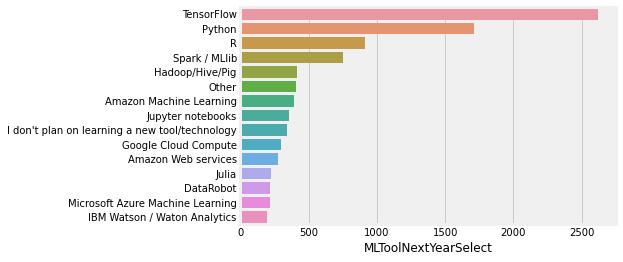

In [56]:
#내년 인기 있는 15개 ML Tools
data = mcq['MLToolNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

**TensorFlow**가 여기서 확실한 승자다. 
- 구글의 딥러닝 프레임워크는 파워와 사용 편의성으로 인해 최근 큰 인기를 얻었다.

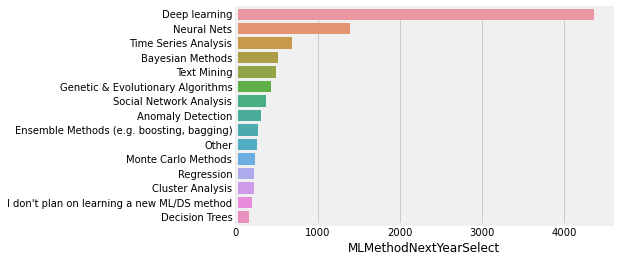

In [63]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

DS Methods에 관한 답은 DS Tools로부터 얻은 것을 근접하게 반영한다. 
- **딥러닝**과 **뉴럴넷**은 Method  2018에서 가장 인기 있는 두 가지 선택이다. 
- 이러한 기술(Neural Networks, Deep Learning 및 TensorFlow)을 학습하기 위한 투자는 가까운 미래에 큰 이익을 가져올 수 있다.

#### 일반 평결

Deep Learning and TensorFlow.

### Q3. 데이터 과학은 어디서 배워야 할까?

매혹적인 인기 때문에, 데이터 사이언스를 배우는 데 이용할 수 있는 자원의 종류와 양에는 정말로 부족함이 없다. 사실, 초보자들은 그들이 선택할 수 있는 엄청난 양의 선택들에 극도로 혼돈되는 경향이 있다. 그들은 대학에서 제공하는 강좌를 들어야 하는가? 아니면 온라인 동영상이 더 실용적인가? 책이 더 실용적인가 ?

이 질문에 다시 답하기 위해, 응답자들이 우리에게 무엇을 말해야 하는지 살펴봅시다.

In [58]:
#각 학습 플랫폼이 언급된 횟수를 얻기 위해 Pandas Dataframe 분해
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

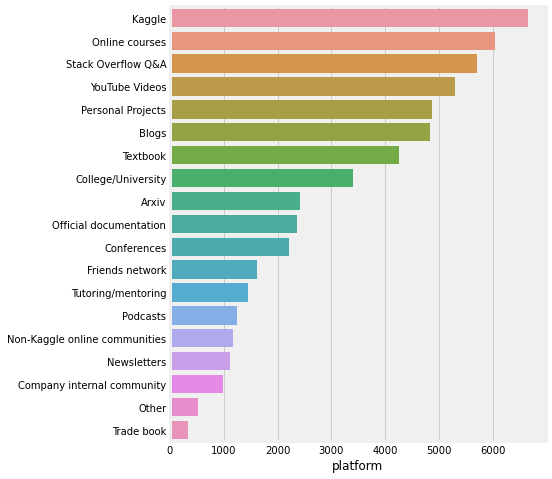

In [60]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts()
sns.barplot(y=data.index, x=data)

**Kaggle**은 응답자들 사이에서 가장 인기 있는 학습 플랫폼이다. 
- 다만 캐글이 이번 조사를 진행한 점 때문에 이들의 대응이 편향됐을 가능성도 있다. 
- **온라인 과정**, **스택 오버플로** 및 **유튜브***가 가장 선호하는 학습 플랫폼 상위 5위에 올랐다. 흥미롭게도, 대학이나 대학 학위는 내가 기대했던 것만큼 그렇게 중요하지는 않으며 책보다 덜 강력한 것으로 여겨진다.

다음으로 각 플랫폼이 얼마나 유용한지 살펴보자.

In [64]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

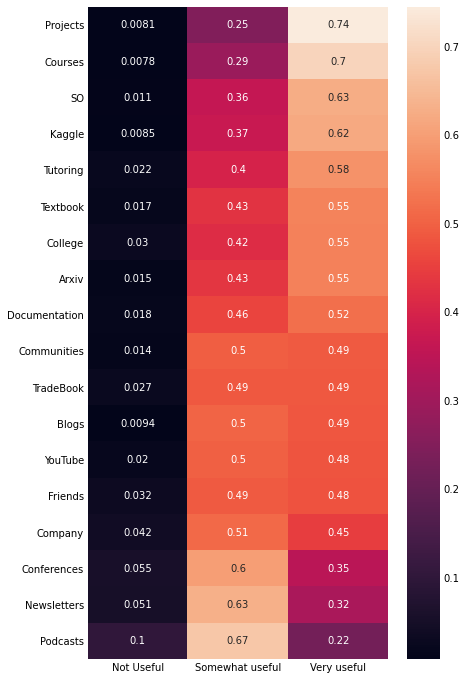

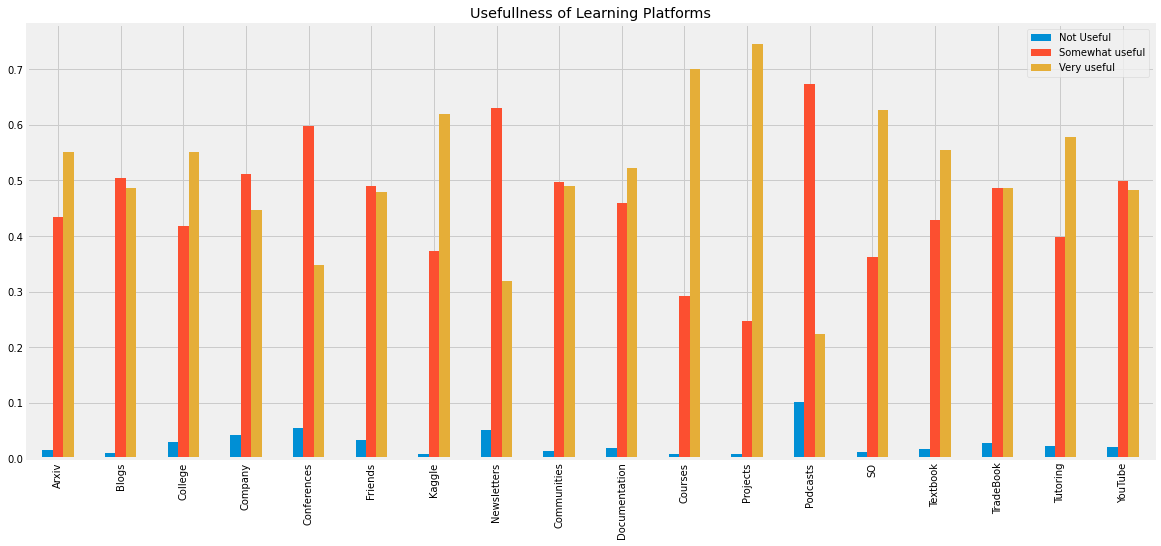

In [67]:
# 다양한 학습 플랫폼의 유용성을 설명하는 Panda DataFrame을 구축
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose()#.sort_values('Very useful', ascending=False)

# 학습 플랫폼 유용성의 Heatmap  
plt.figure(figsize=(6,12))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

#학습 플랫폼 유용성에 대한 그룹화
fdf.plot(kind='bar', figsize=(18,8), title="Usefullness of Learning Platforms")
plt.show()

"일반적으로 **프로젝트**는 *매우 유용함*으로 표시된 프로젝트 중요도 질문에 74.4% 이상의 응답자가 응답해 가장 유용한 학습 플랫폼으로 평가받고 있다. 응답자의 1% 미만이 프로젝트가 전혀 유용하지 않다고 생각했다.

팟캐스트는 전혀 유용하지 않다는 응답이 10%로 가장 많았고, 대다수의(65%)가 다소 유용하다고 생각하는 것으로 나타났다.

In [68]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]

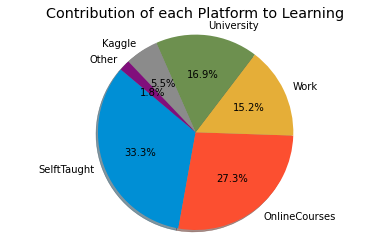

In [69]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)

#Plot a Pie Chart of the contribution of each platform to learning
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

응답자들은 학습의 대부분을 **자율교육** 및 **온라인 과정**으로 돌리고 있다. 
- 이 두 가지를 합치면, 한 사람이 학습하는 총량의 60% 이상을 차지한다. 대부분의 응답자들이 석사학위나 박사학위를 소지하고 있다는 점을 고려하면 대학의 기여도는 놀랄 만큼 낮다.

#### 일반 평결

온라인 코스, 스택 오버플로, 캐글은 데이터 과학을 위한 가장 인기 있는 학습 플랫폼이다.
- 데이터 과학을 배우는 가장 좋은 방법은 **개인 프로젝트**를 통해서입니다. 이를 통해서 가장 많이 배운다.
- 직업을 찾는데 있어서 학위가 중요할지 모르지만, 그것은 '자가 학습'에 비해 당신의 학습에 놀랄 만큼 적은 기여를 한다.

### Q4. 데이터 사이언스를 하려면 엄청나게 좋은 컴퓨터가 필요한가?

데이터 과학에 관한 매우 일반적인 질문 중 하나는 DS 작업을 수행하는 데 일반적으로 필요한 컴퓨팅 성능이다. DS Project에 많은 양의 RAM과 Disk Space를 갖춘 고성능 컴퓨터가 필요하다는 잘못된 인식이 매우 흔하다. 산업 수준 딥러닝의 경우도 그렇지만, 일반적으로 개인용 컴퓨터도 충분한 성능을 지닌다.

이에 대해 응답자들이 어떤 말을 하는지 살펴봅시다.

In [70]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [71]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [72]:
s[s != 'nan'].value_counts()

Basic laptop (Macbook)                                  2246
 GCE ...)                                                669
Laptop + Cloud service (AWS                              669
 Azure                                                   669
Gaming Laptop (Laptop + CUDA capable GPU)                641
Traditional Workstation                                  527
Laptop or Workstation and local IT supported servers     445
GPU accelerated Workstation                              416
Workstation + Cloud service                              174
Other                                                    147
Name: hardware, dtype: int64

이 질문에 답한 대부분의 응답자들은 개인 프로젝트를 위해 **Basic Laptop**을 사용한다고 말했다.

#### 일반 평결

개인 프로젝트의 경우 하드웨어에 대해 너무 많은 시간을 투자하지 마십시오. 거의 모든 경우에 맥북과 같은 기본적인 노트북으로 충분할 것이다.

### Q5. 데이터 과학을 공부하는 데 얼마나 많은 시간을 투자해야 할까?

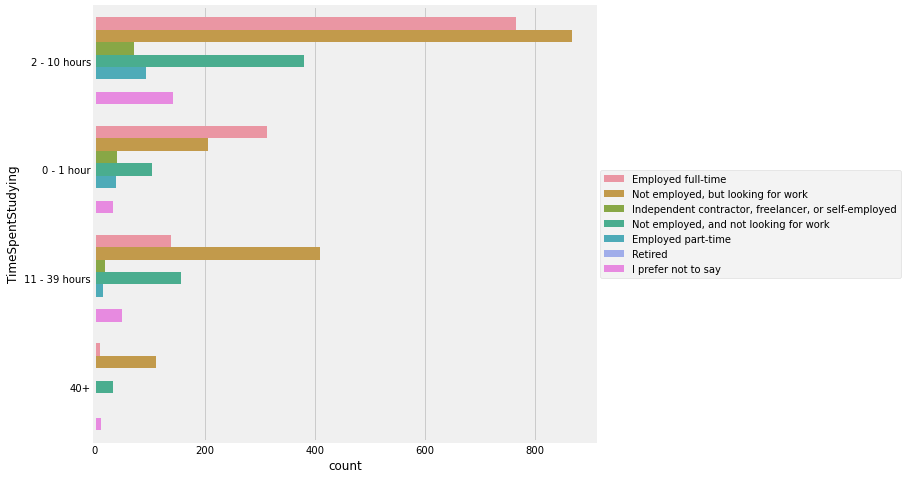

In [73]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

흥미로운 관찰은 **무직**이 전체 응답자의 소수임에도 불구하고 이 질문에 답하는 집단의 대다수를 형성하고 있다는 것이다. 
- 이 그룹은 전형적으로 아직 대학이나 대학원에 있는 학생들을 포함해야 한다.

그들 대부분은 매주 2시간 이상 공부하는 경향이 있다. 실업자 중 상당수는 데이터 사이언스를 배우는 데 10시간 이상을 투자했다.

#### 일반 평결

이런 경우에는 정말 말하기 어렵다. 일반적으로 정규직일 때와 비교해 실업자일 경우 더 많은 노력을 기울여야 한다.

### Q6. 내가 따라갈 수 있는 블로그, 팟캐스트, 강좌 등을 추천해 줄 수 있는가?

In [74]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))

In [75]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'

In [76]:
s = s[s != 'nan'].value_counts()

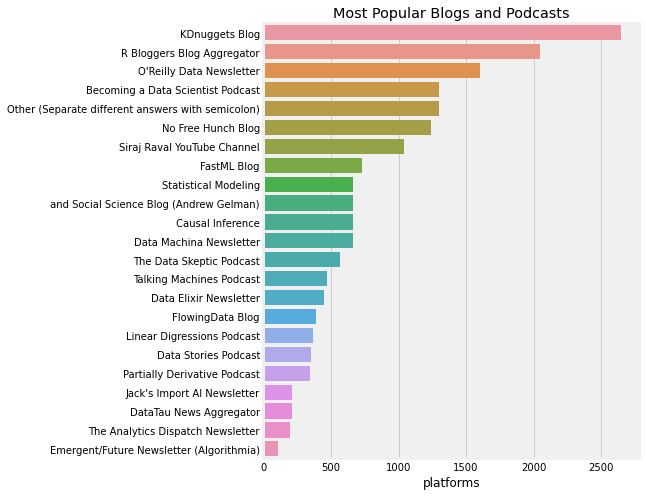

In [77]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

**KDNuggets 블로그**, **R 블로거 블로그 Aggregator** 및 **O'Reilly 데이터 소식지**는 응답자들 사이에서 가장 인기 있는 블로그 및 팟캐스트다. 
- 목록에 있는 다른 대부분의 항목들도 데이터 과학을 배우는 데 정말 좋은 자료라는 것을 반드시 알아야 한다.

In [78]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))

In [79]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'

In [80]:
t = t[t != 'nan'].value_counts()

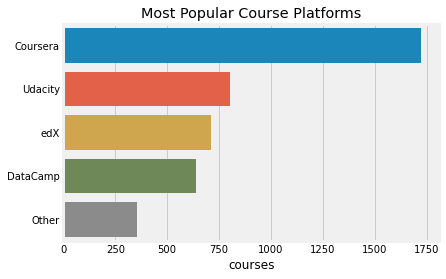

In [81]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

#### 일반 평결

- **KDNuggets** 블로그는 매우 인기가 있고 응답자들이 추천한다. 
- **Coursera**는 온라인 강좌에서 데이터 사이언스를 배우는 데 가장 인기 있는 플랫폼이다.

### Q7. 데이터 사이언스 직업에서 가장 중요한 기술은?

다양한 데이터 사이언스 직업에 특별한 기술이 꼭 필요한가? 다양한 종류의 기업과 산업에서 데이터 과학자로 고용된 사람들로부터 알아보자.

In [82]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 and x.find('JobSkillImportanceOther') == -1]

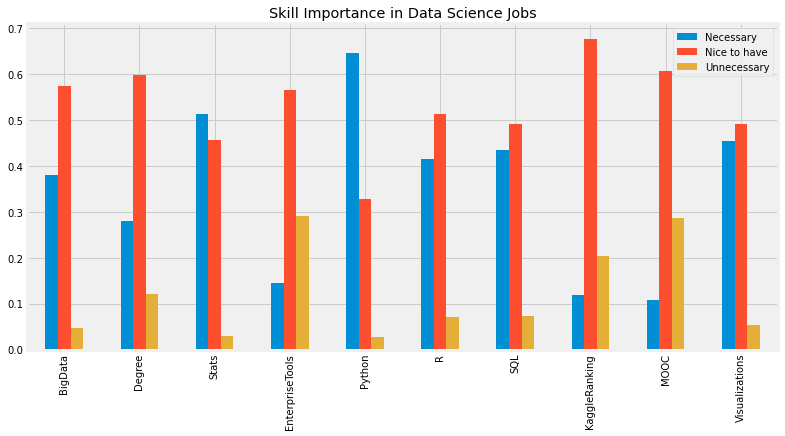

In [83]:
#Get a Pandas DataFrame of Skill Importance of Data Science Jobs
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
#fdf = pd.DataFrame(fdf)
jdf = pd.DataFrame(jdf).transpose()

jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")

#### 일반 평결

- **파이썬**, **Stats 및 시각화**는 데이터 과학자가 작업 중 갖춰야 하는 가장 중요한 기술 중 하나이다. 
- **MOOCs** 및 **엔터프라이즈 툴**은 대부분의 데이터 과학 작업에서 상대적으로 중요하지 않다.

### Q8. 데이터 사이언티스트의 평균 연봉은?

데이터 사이언티스트(Data Scientist)는 *하버드 비즈니스 리뷰*에 의해 21세기 가장 섹시한 직업으로 선전되어 왔다. 그 이유의 일부는 데이터 과학자들이 명령하는 수익성 있는 급여에 기인할 수 있다. 데이터 과학은 사람이 다양한 분야, 기술 및 도구(프로그래밍, 통계, 시각화 등)에 능숙해야 하는 매우 다양한 역할이다.

- 이 섹션에서는 응답자들의 평균 급여를 살펴보기로 한다. 이곳은 우리의 수치가 응답자의 국적에 의해 심하게 편향될 한 곳이다. 
- 비록 우리가 전환율에 대한 데이터를 가지고 있지만, 특정 국가의 급여 수준을 결정하는 것은 그다지 좋지 않다. 10만 달러의 연봉은 인도와 미국에서 다른 것을 의미한다.

따라서 나는 그 나라에 대한 요약 통계와 급여 배포를 입력으로 받아 출력하는 함수를 쓰겠다. 이것은 우리에게 여러 나라의 급여에 대한 훨씬 더 정확한 그림을 줄 것이다.

In [84]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [85]:
#모든 급여 값을 변동으로 변환하십시오. 불가능할 경우 NaN으로 변환
def clean_salary(x):
    x = x.replace(',', '')
    try:
        return float(x)
    except:
        return np.nan

In [86]:
#해당 국가에 대한 급여 통계를 출력하고 급여 분포를 표시하는 함수
def salary_stats(country):
    data = mcq[(mcq['CompensationAmount'].notnull()) & (mcq['Country'] == country) ]
    data['CompensationAmount'] = data['CompensationAmount'].apply(clean_salary)
    print(data[data['CompensationAmount'] < 1e9]['CompensationAmount'].describe())
    sns.distplot(data[data['CompensationAmount'] < 1e9]['CompensationAmount'])

count    5.700000e+02
mean     1.105683e+06
std      1.575944e+06
min      0.000000e+00
25%      1.625000e+05
50%      6.590000e+05
75%      1.600000e+06
max      2.300000e+07
Name: CompensationAmount, dtype: float64


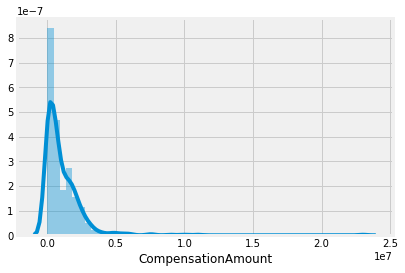

In [87]:
salary_stats('India')

count    1.544000e+03
mean     1.178799e+05
std      9.542697e+04
min      0.000000e+00
25%      7.500000e+04
50%      1.050200e+05
75%      1.452500e+05
max      2.500000e+06
Name: CompensationAmount, dtype: float64


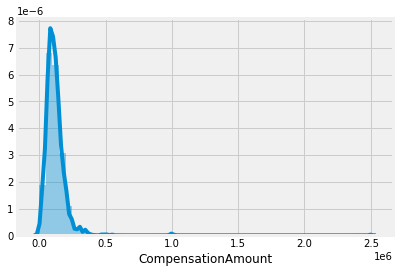

In [88]:
salary_stats('United States')

**인도의 평균 연봉은 Rs. 65만*** (약 1만 원)이고, **미국의 연봉은 10만 5천 달러*이다. 미국 데이터 사이언티스트가 원환율 기준으로 10배 이상 벌어들인 것으로 보이지만, 반드시 인도의 데이터 사이언티스트보다 10배 이상의 소비력을 갖고 있는 것은 아니다.

### Q9. 개인 및 과정 프로젝트용 데이터셋은 어디에서 가져올 수 있는가?

In [89]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [90]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'

In [91]:
q = q[q != 'nan'].value_counts()

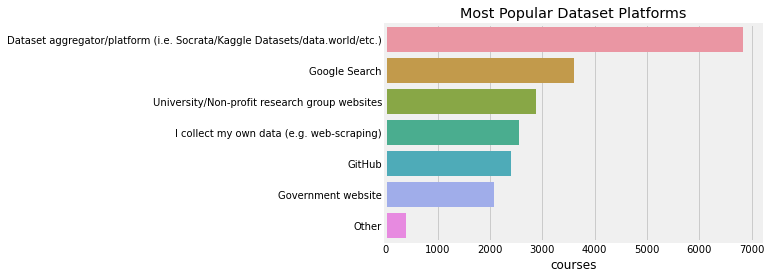

In [92]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

#### 일반 평결

**Kaggle**, **Socrata**와 같은 데이터셋 집계기는 개인 프로젝트를 위한 데이터셋을 찾는 사람들이 가장 많이 찾는 플랫폼이다. 구글의 일반 검색과 대학/비수익 조사 그룹 웹사이트는 각각 2위와 3위를 차지하고 있다.

In [93]:
ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)

None                     23
Cleaning                 20
Cleaning the data        20
Dirty data               16
Data Cleaning            14
none                     13
dirty data               10
Data cleaning            10
Size                      9
-                         9
Missing data              8
cleaning                  8
Incomplete data           8
Lack of documentation     7
Quality                   6
Name: PersonalProjectsChallengeFreeForm, dtype: int64

또한 데이터셋을 처리할 때 가장 큰 문제 중 하나가 부정한 데이터라는 것을 알 수 있다. 공공 데이터셋으로 작업하는 상위 15개 과제는 거의 모두 데이터 논쟁과 정리와 관련이 있다.

### Q10. Data Science 직업은 보통 무엇을 포함하는가?

아주 일반적인 오해는 데이터 과학자가 예측 모델과 기능 엔지니어링을 구축하는데 대부분의 시간을 보낸다는 것이다. 이것은 대부분의 경우에 사실이 아니다. 앞 절에서 보았듯이, 공공 데이터셋과 데이터 과학자가 작업할 때 데이터 정리는 가장 큰 어려움 중 하나이며, 데이터 정리 및 논쟁에 대부분의 시간을 사용하기에 적합한 형태로 소비한다.

In [96]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



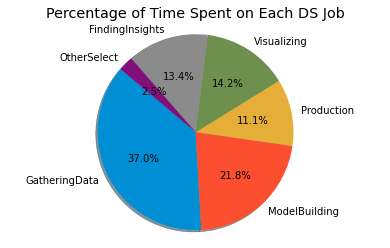

In [97]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

#### 일반 평결

**데이터 수집***(데이터 논쟁 및 정리)에 3분의 1 이상이 소요된다. 데이터 사이언티스트의 업무 중 가장 '멋진' 부분인 모델 구축은 시간의 5분의 1밖에 차지하지 않는다.

### Q11. 데이터 과학 직업을 갖기 위해 고려해야 할 요소는 무엇인가?

In [98]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]

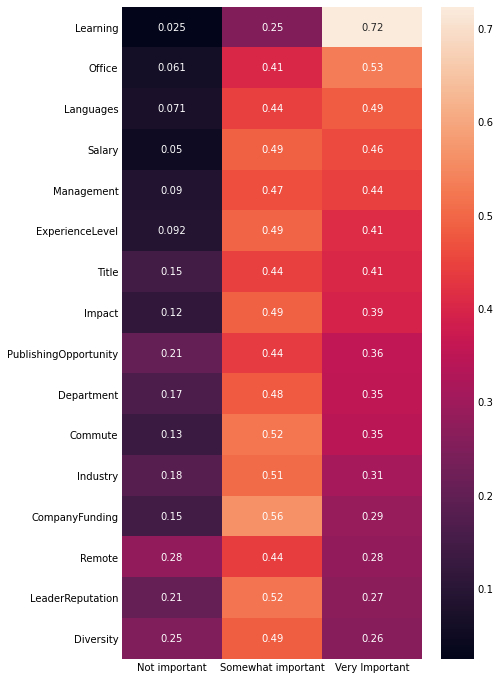

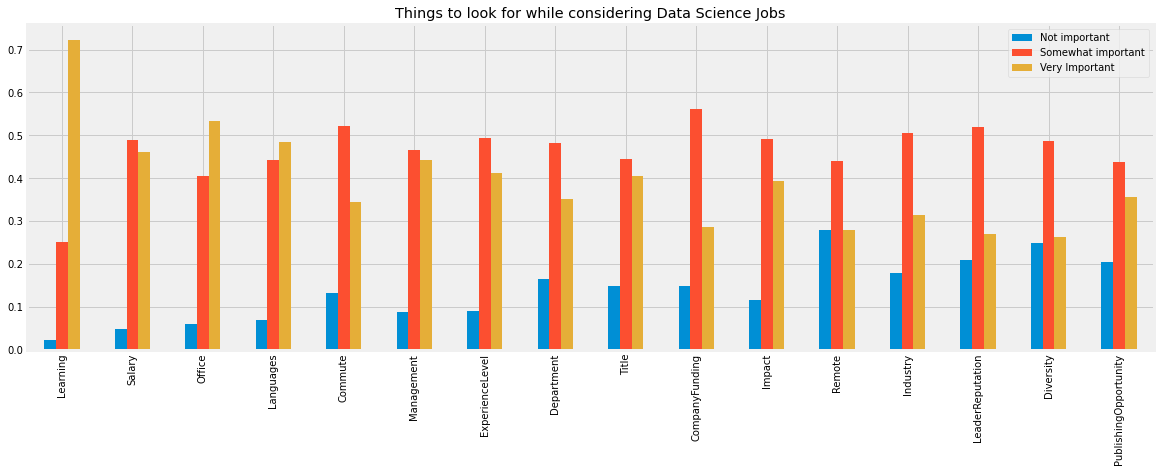

In [99]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,12))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

jfdf.plot(kind='bar', figsize=(18,6), title="Things to look for while considering Data Science Jobs")
plt.show()

#### 일반 평결

**학습 기회**는 데이터 과학 직종에 지원하면서 응답자들이 가장 많이 고려하는 요인이다. 직장을 구할 때 고려해야 할 또 다른 중요한 요인은 사무실, 언어 사용, 급여 및 관리다.

### Q12. 데이터 과학에서 성공하기 위해 학위가 얼마나 중요한가?

온라인에서 이용할 수 있는 무료 자원과 전문 온라인 인증이 넘쳐나는 상황에서, 우리 대부분은 현장에서 우리 자신을 훈련시키기 위해 관련 대학 학위를 받는 것이 얼마나 중요한가 하는 것이다. 알아보자!

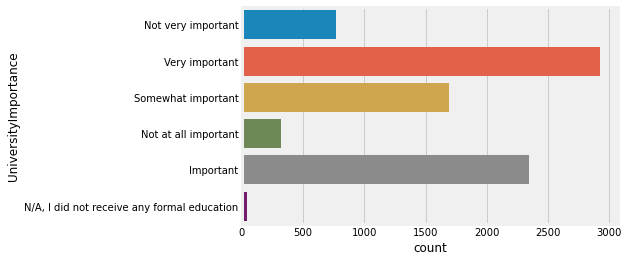

In [100]:
sns.countplot(y='UniversityImportance', data=mcq)

논평자 중 한 명인 [Shawn Hansen](https://www.kaggle.com/shawnhansen),은 사람들이 더 많은 업무 경험을 축적하는 경향이 있기 때문에 대학 중요도는 나이가 들수록 감소하는 경향이 있다고 제안했다. 그것이 사실인지 확인해보자.

In [101]:
top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

우리는 다양한 수준의 중요성을 대학에 귀속시키는 사람들의 연령 분포가 다소 중복되는 경향이 있다는 것을 안다. 하지만, 대학이 전혀 중요하지 않다고 말하는 사람들은 아주 약간 나이가 든 경향이 있다. 숀이 말했듯이, 이것은 학위의 중요성을 과소평가하는 이유는 더 많은 업무적 경험이 있기 때문일 수 있다.

#### 일반 평결

대부분의 응답자들은 University Deposites를 *매우 중요*로 선언하면서 University Deposites에 많은 중요성을 부여한다. 300명도 안 되는 사람들이 대학이 전혀 중요하지 않다고 생각했다.

대부분의 응답자가 대학원에 다니고 석박사 학위를 취득한 사실을 감안하면 전혀 놀라운 결과가 아니다.

### Q13. 데이터 과학을 어디서부터 배우지?

앞의 몇 섹션에서는 응답자들이 데이터 과학을 배우는 다양한 플랫폼과 방법을 강조하였다. 그런데 초심자에게 특히 인기 있는 플랫폼이 있을까?

In [102]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

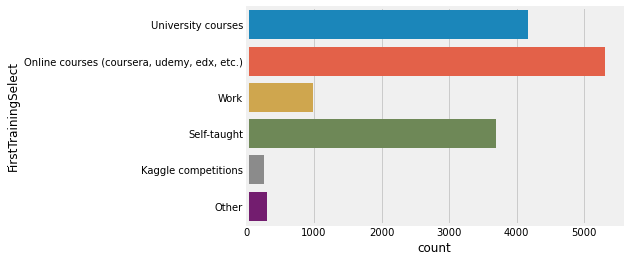

In [103]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

놀랍게도, 응답자 인구의 대부분이 학사 학위와 높은 학위를 가지고 있고 대학 교육에 많은 중요성을 부여했지만, 응답자 중 다수는 **온라인 과정**과 **자체 학습**으로 데이터 과학 학습을 시작했다. 대학 과정이 2위를 차지했다.

내가 보기에 온라인 학습은 사람들이 관심을 갖도록 하는데 상당한 역할을 하고 있고 데이터 과학에서 출발하는 것 같다.

### Q14. 데이터 과학 재개에 있어 가장 중요한 것은 무엇인가?

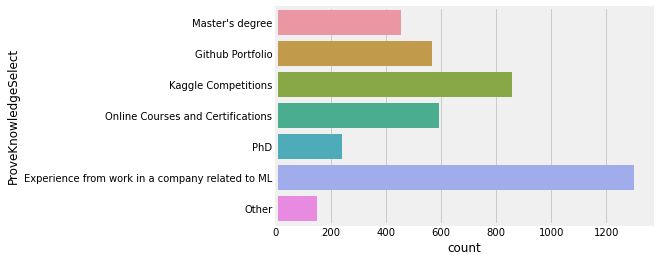

In [104]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

#### 일반 평결

응답자에 따르면, 해당 분야의 **직업 경험**은 데이터 과학에 대한 개인의 전문지식을 나타내는 가장 중요한 지표라고 한다.
- **캐글 대회** 결과가 2위를 차지했다. 흥미롭게도, 우리의 응답자들은 온라인 과정과 인증에 높은 가치를 두고 있지만, 이력서에 그들의 존재와 능력에 대해서는 여전히 뜨거운 논쟁을 벌이고 있다.

### Q15. 내가 사용하는 ML 알고리즘 뒤에 있는 수학에 대해 알아야 하는가?

- 대부분의 ML 알고리즘은 상당히 많은 양의 수학(특히 선형 대수)을 갖는 경향이 있다. 
- 그러나 scikit과 같은 라이브러리는 우리에게서 이러한 모든 세부사항을 추상적으로 없애고 
- 기반 기술을 알지 못한 채 ML 모델을 훈련시키는 것을 믿을 수 없을 정도로 단순하게 만든다. 
- 하지만 그럼에도 불구하고 그 수학을 아는 것이 중요한가?

In [105]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

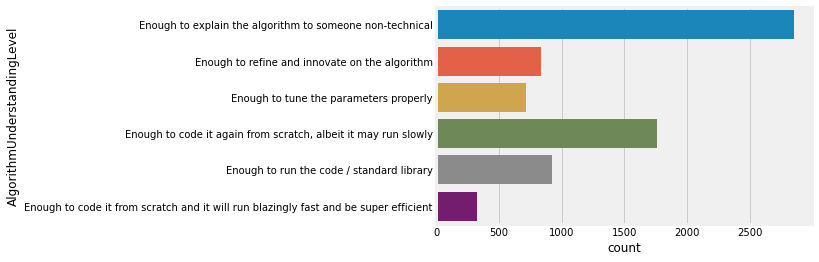

In [106]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

#### 일반 평결

설문조사에 수집된 응답으로 볼 때, 현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다. ML 표준 라이브러리를 운영할 수 있을 정도로 충분히 알고 있는 사람은 1000명 미만(15%)이었다.

우리 인구의 대부분은 고용되어 있기 때문에, 사람들이 수학을 배우도록 격려하는 것이 좋은 조언이 될 것이다.

### Q16. 어디서 일자리를 찾아야 할까?

이 질문에 답하기 위해, 우리는 두 가지 특징을 살펴볼 것이다: 완전 고용된 사람들이 현재 직장을 얻었는지와 우리의 응답자 중 구직자들이 데이터 과학 일자리를 찾고 있는지.

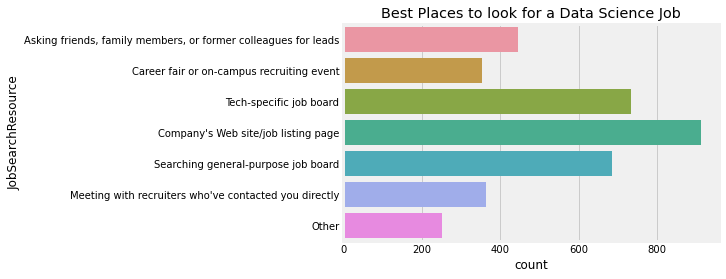

In [107]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

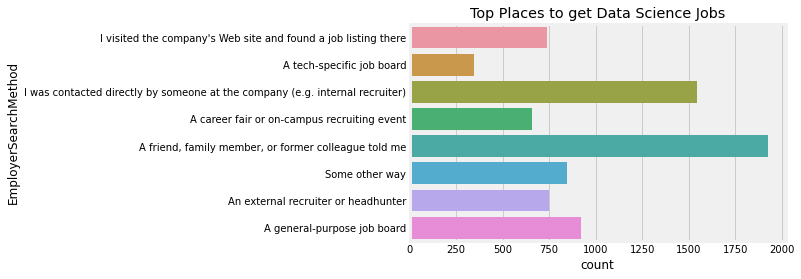

In [108]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

위에서 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나, 채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

## 결론

- 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
- 하지만 Python과 R을 모두 사용하는 사람도 많다.
- 데이터 수집과 정제는 어려운 일이다.(공감)
- 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
- 내년에 유망한 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.